In [2]:
%config IPCompleter.greedy=True
import re
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
def parse_tag(msg):
    m = re.match(r'(\[.+?\])(.*)', msg)
    if m:
        return m.group(1).lower(), m.group(2)
    # m = re.match(r'([A-Z]+?)-\d+?\D(.*)', msg)
    # if m:
    #     return m.group(1).lower(), m.group(2)
    m = re.match(r'([A-Za-z]+?):(.*)', msg)
    if m and len(m.group(1)) < 10:
        return '[{}]'.format(m.group(1).lower()), m.group(2)
    return '', msg

def handle_tags(line):
    tag, rest = parse_tag(line)
    issue_tags = re.findall(r'[^\n ]??([A-Z]+)-(?:CR-)?\d+[^ ]?', rest)
    issue_tags = set(map(str.lower, issue_tags))
    issue_tags = ' '.join(map((lambda s: '{{{}}}'.format(s)), issue_tags))
    rest = re.sub(r'[^\n ]??([A-Z]+)-(?:CR-)?\d+[^ ]?', r'', rest)
    return tag, issue_tags, rest

def remove_numbers(line):
    return re.sub(r'( |^)(\d+)( |$)', r'\1\3', line)

In [4]:
diffs = []
with open('generated_data/test.diff', 'r', encoding='utf8') as inf:
    for line in inf:
        diffs.append(line.strip())

test_diffs_count = len(diffs)

with open('generated_data/train.diff', 'r', encoding='utf8') as inf:
    for line in inf:
        diffs.append(line.strip())

In [94]:
count_vectorizer = CountVectorizer(token_pattern=r'\S+', stop_words=['<nl>'], binary=True)
bow_matrix = count_vectorizer.fit_transform(diffs)
print(len(count_vectorizer.vocabulary_))
counts = bow_matrix.sum(axis=0).getA1()

241957


numpy.ndarray

In [102]:
counts[counts > 100].shape

(3717,)

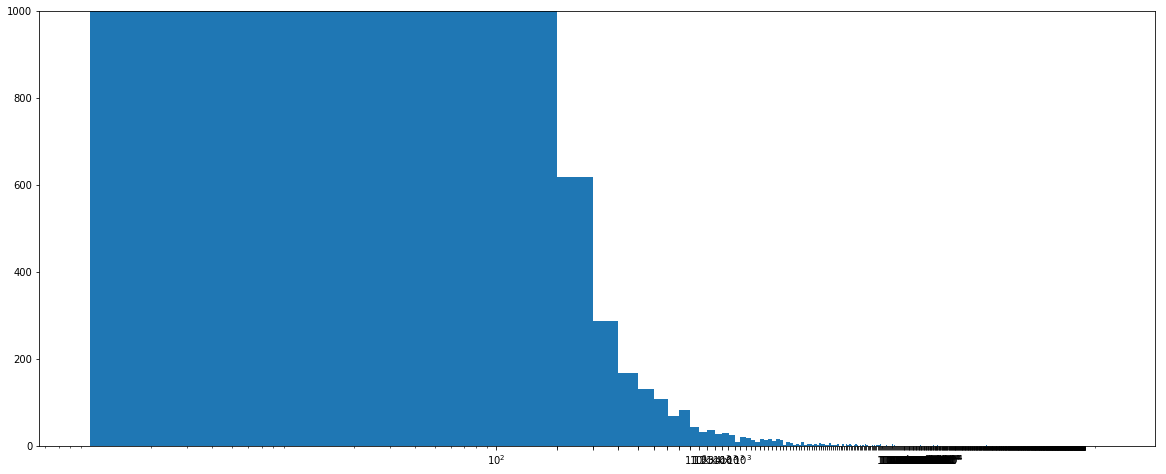

In [77]:
bins = [i for i in range(1, 100000, 100)]
#bins.extend([i for i in range(100, 1000, 100)])
#bins.extend([i for i in range(1000, 10000, 100)])
#bins.extend([i for i in range(10000, 100000, 10000)])
plt.figure(figsize=(20, 8))
plt.ylim([0, 1000])
plt.xscale('log')
plt.xticks(ticks=[i for i in range(0, 80000, 100)])
plt.hist(counts, bins=bins)
plt.show()

In [103]:
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\S+', stop_words=['<nl>'], max_df=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(diffs)
index = tfidf_vectorizer.get_feature_names()
# tfidf = []
# for row in tfidf_matrix:
#     cur_tfidf = {index[word_id] : score for word_id, score in zip(row.indices, row.data)}
#     tfidf.append(cur_tfidf)
len(index)

238240

In [24]:
def tokenize_msg(line):
    tag, issue_tags, rest = handle_tags(line)
    res = []
    if tag:
        res.append(tag)
    if issue_tags:
        res.append(issue_tags)
    res.append(tokenize(rest))
    return ' '.join(res)

def tokenize(line):
    line = re.sub(r'(\w)(?=[^a-zA-Z0-9_ ])', r'\1 ', line)
    line = re.sub(r'([^a-zA-Z0-9_ ])(?=\w)', r'\1 ', line)
    line = re.sub(r'([^a-zA-Z0-9_ ])(?=[^a-zA-Z0-9_ ])', r'\1 ', line)
    line = remove_numbers(line)
    line = ' '.join(line.split())
    return line

In [26]:
dataset='generated_data'

with open('{dataset:}/test.msg'.format(dataset=dataset), 'r', encoding='utf8') as inf:
    lines = list(inf)

lines = list(map(tokenize_msg, lines))

with open('{dataset:}/test2.msg'.format(dataset=dataset), 'w', encoding='utf8') as ouf:
    for line in lines:
        ouf.write(line + '\n')

with open('{dataset:}/train.msg'.format(dataset=dataset), 'r', encoding='utf8') as inf:
    lines = list(inf)

lines = list(map(tokenize_msg, lines))

with open('{dataset:}/train2.msg'.format(dataset=dataset), 'w', encoding='utf8') as ouf:
    for line in lines:
        ouf.write(line + '\n')

In [107]:
corpus = [
    'This is the first is document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
index = vectorizer.get_feature_names()
tfidf = []
for row in tfidf_matrix:
    cur_tfidf = {index[word_id] : score for word_id, score in zip(row.indices, row.data)}
    tfidf.append(cur_tfidf)
print(index)
print(tfidf_matrix.shape)
print(tfidf_matrix)
print(tfidf)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)
  (0, 8)	0.3197864157275553
  (0, 3)	0.6395728314551106
  (0, 6)	0.3197864157275553
  (0, 2)	0.4831415110134742
  (0, 1)	0.3911446921950442
  (1, 8)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 6)	0.281088674033753
  (1, 1)	0.6876235979836938
  (1, 5)	0.5386476208856763
  (2, 8)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 6)	0.267103787642168
  (2, 0)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 4)	0.511848512707169
  (3, 8)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 6)	0.38408524091481483
  (3, 2)	0.5802858236844359
  (3, 1)	0.46979138557992045
[{'this': 0.3197864157275553, 'is': 0.6395728314551106, 'the': 0.3197864157275553, 'first': 0.4831415110134742, 'document': 0.3911446921950442}, {'this': 0.281088674033753, 'is': 0.281088674033753, 'the': 0.281088674033753, 'document': 0.6876235979836938, 'second': 0.5386476208856763}, {'this': 0.267103787642168, 'is': 0.26710378764